## Lecture 5: Fourier transform

In this in-class exercise we start playing around with the Fourier transform. We first try to see what the Fourier transform does; next, we try to filter out noise by implementing a simple low-pass filter

In [6]:
# Importing packages
from scipy.fftpack import fft2, fftshift, ifft2, ifftshift
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
import skimage
import matplotlib
from skimage import io
from skimage import color
from matplotlib import cm
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,16)

### Task 1: The Fourier transform of an image

In the cell below, an image is loaded and visualized for you. Please go through the following steps of computing its Fourier transform:

1. Take Fourier transform using:

f_fft = fft2(f)

2. Verify that the Fourier transform is complex valued:

print(f_fft)

3. Compute the magnitude of the values of f_fft (giving the Fourier spectrum):

f_fft_abs = np.absolute(f_fft)

4. View the image and its Fourier spectrum by filling out the commented-out imshow

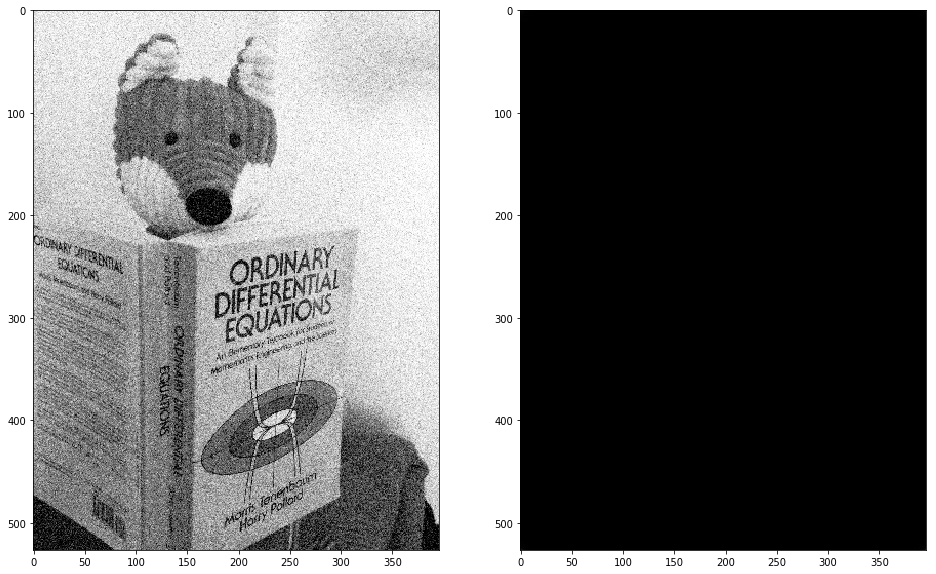

In [7]:
# Read image
f = np.array(color.rgb2gray(io.imread('noisy_smartgirl.png').astype(float)))

# Take Fourier transform
f_fft = fftpack.fft2(f)

# Verify that it is complex valued
#print(f_fft)

# Take magnitude of values of f_fft (giving the Fourier spectrum)
f_fft_abs = np.absolute(f_fft)

# View image and Fourier spectrum
fig, ax = plt.subplots(1,2)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(f_fft_abs, cmap=cm.Greys_r)

What did we learn from that? Hmm...

The Fourier spectrum is on a scale that does not visualize well. Let's transform it to enhance contrast by applying, in each voxel of f\_fft\_abs: 
* The log transformed spectrum $100 \log ( 1 + |f\_fft|)$

Next, plot the image and its log-transformed spectrum by filling out the commented-out imshow

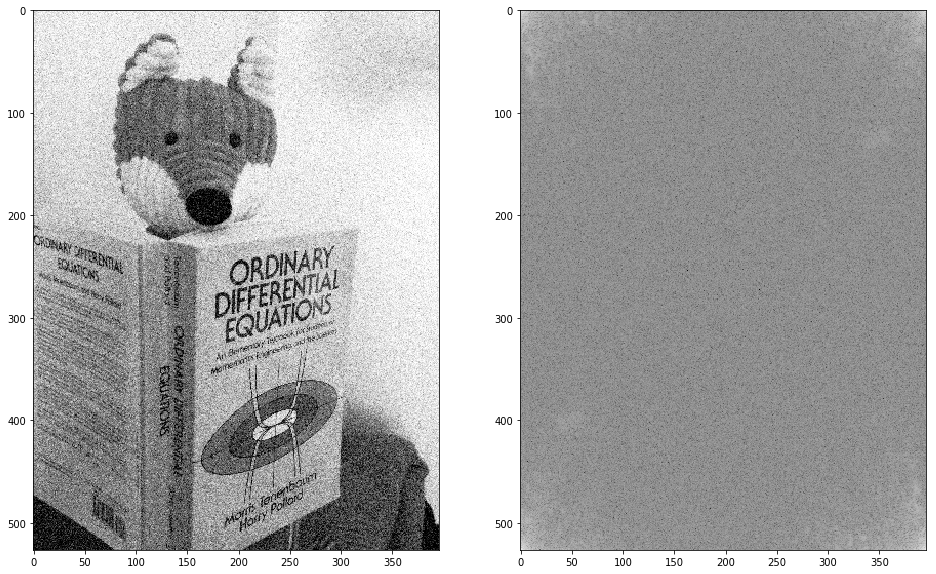

In [8]:
# The log-transformed spectrum:
f_logtrans = 100*np.log(1 + f_fft_abs)

# View image and the log transformed spectrum
fig, ax = plt.subplots(1,2)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(f_logtrans, cmap=cm.Greys_r)

Now, the low frequencies are found at the boundaries. It is customary to shift them to the middle; this can be done using the fftshift algorithm:

f_logtrans_shifted = fftshift(your_logtransformed_spectrum)

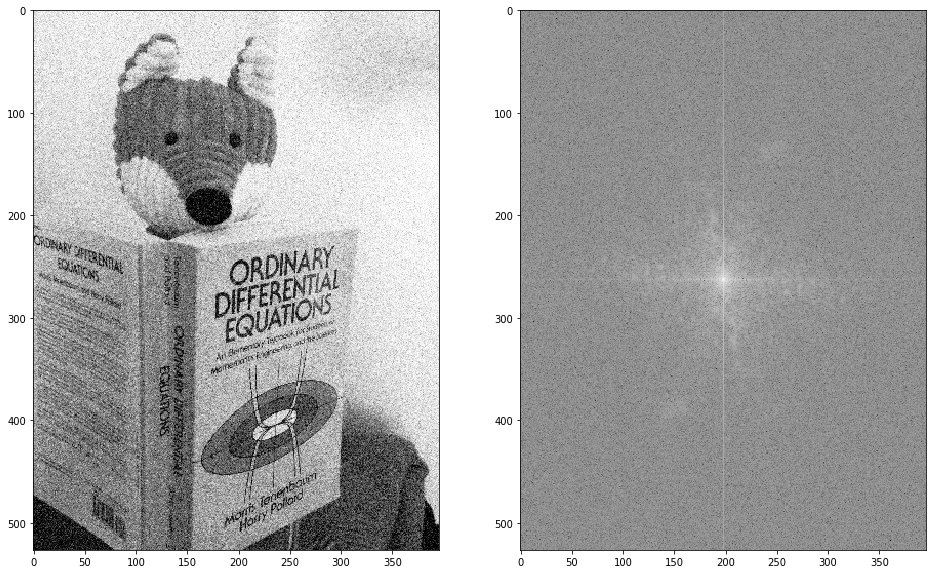

In [9]:
# Apply fftshift
f_logtrans_shifted = fftpack.fftshift(f_logtrans)

# View image, the power spectrum and the log transformed spectrum
fig, ax = plt.subplots(1,2)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(f_logtrans_shifted, cmap=cm.Greys_r)

For the benefit of the remainder of the exercise, write a function that takes a Fourier spectrum as input and returns its log transform.

In [10]:
def log_spectrum(I):
    I_fft = fftpack.fft2(I)
    I_fftshifted = fftpack.fftshift(I_fft)
    return 100*np.log(1 + np.absolute(I_fftshifted))

### Task 2: Understanding the Fourier transform

As you may have surmised, the Fourier transform is a map that takes an image as input and returns a new image. There is also an inverse Fourier transform. By playing around with these two, we will try to decipher what the Fourier transform is actually doing, and use that understanding to design a filter that can remove high-frequency noise.

Please perform the following experiment:
* Using np.max(Your_Image), or similar, get yourself an idea of what it means for a value in the Fourier spectrum to be *high*.
* Pick a random pixel from the Fourier spectrum and replace its value with a high value
* Apply the inverse fftshift to get your Fourier spectrum back in its usual coordinates:

deshifted_edited = ifftshift(your_edited_spectrum)

* Apply the *inverse* Fourier transform to your edited spectrum using:

inverse_edited = ifft2(deshifted_edited)

* Visualize the result alongside the original image. What do you see?

* Perform the inverse fftshift + inverse Fourier transform to your un-edited spectrum to verify that the differences you saw were indeed due to your changed pixel.

In [14]:
# Please include your experiment here.



Next, repeat the experiment by choosing new pixels to make bright. What happens if you pick
* A pixel close to the origin of the fftshifted Fourier spectrum?
* A pixel far from the origin of the fftshifted Fourier spectrum?

What do you deduce from this?

In [15]:
# Please include your experiment here.



### Task 3: A simple low-pass filter

Now, we are ready to filter out high frequency contributions to the image by filtering in the Fourier domain, as follows:
* We design a very simple filter that sets all pixels to 0 whose distance to the origin in the fftshifted Fourier spectrum is more than a fixed radius rad.
* Below, I have coded for you a mask that, when multiplied coordinate-wise onto the image, does precisely this.
* Please finish the function by filling in the multiplication and the filtering back and forth. Apply it to the image. What do you see?
* This is called a *low-pass filter* because only the low frequencies are retained

/home/aasa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


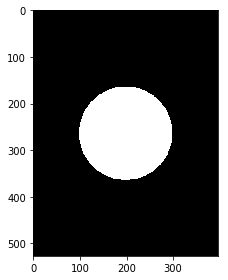

In [8]:
def make_mask(f, rad):
    mask = np.zeros(f.shape)
    n, m = f.shape
    for i in range(n):
        for j in range(m):
            r = np.linalg.norm([i-n/2, j-m/2])
            if r < rad:
                mask[i,j] = 1
    
    return mask

rad = 100 # radius
mask = make_mask(f, rad)
# Take a look at the filter
io.imshow(mask, cmap=cm.Greys_r)

In [4]:
def lp_filter(f, rad):    
    # 1. Apply Fourier transform
    # 2. Apply fftshift
    # 3. Apply filter
    # 4. Apply inverse fftshift
    # 5. Apply inverse Fourier transform
    return result


# Apply the low pass filter and view the result. Try different radii; what is the effect?


### Task 4: This is a picture of a DIKU teacher. Who is it?